<a href="https://colab.research.google.com/github/CarlosSMWolff/Quantum-Optics-Course/blob/main/1_Quantum_single_mode_field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install necessary libraries

In Colab, we will need to install qutip into the machine.

In [2]:
! pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 55.4 MB/s eta 0:00:00


Load libraries

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cm


# Single-mode field: definitions of operators and basis states (Fock states)

When describing numerically the states of a harmonic oscillator, we must always make a first approximation: truncating the Hilbert space. Unfortunately, we cannot yet fit the infinite Hilbert space of the harmonic oscillator in our RAM memory, so we must choose a number of levels to be included in our description, which we define here as ```Ntrun```. 



In [2]:
Ntrun = 20

Now we can defined our annihilation operator in our truncated Hilbert space, using the Qutip command ```destroy```


In [3]:
a = destroy(Ntrun)

The basis in which operators are built is the basis of Fock states, i.e. the eigenstates of the free harmonic oscillator. We can use the command ```basis``` to create such states. Let's see an example creating


1.   The vacuum state, $|0\rangle$
2.   A state with exactly 3 photons, $|3\rangle$


In [4]:
vac = basis(Ntrun,0)
fock3 = basis(Ntrun,3)

Let us know compute some expectation values to check that we get the correct mean photon numbers, given by the expectation value of the operator $a^\dagger a$, which we define as ```a.dag()*a```. 

Notice that, in Qutip:

1.  Products of operators are done with the ```*``` operator.
2.  Conjugate transpose of an operator is obtained using the function ```.dag()```.



In [5]:
expect(a.dag()*a, vac)

0.0

In [6]:
expect(a.dag()*a, fock3)

2.9999999999999996

# Visualizations in phase space

We compute the Wigner function to visualize states in phase space

In [7]:
xvec = np.linspace(-5, 5, 500)
W_vacuum = wigner(vac, xvec, xvec, g=2)

Let us define a function to plot Wigner functions from now on

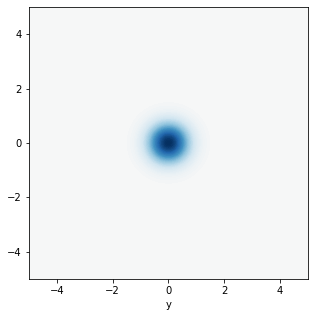

In [8]:
  wmap = wigner_cmap(W_vacuum)  # Generate Wigner colormap
  nrm = mpl.colors.Normalize(-W_vacuum.max(), W_vacuum.max())

  fig, ax = plt.subplots(figsize=(5,5))
  ax.contourf(xvec, xvec, W_vacuum, 100, cmap=cm.RdBu, norm=nrm)
  ax.set_xlabel("x")
  ax.set_xlabel("y")
  plt.show()


# Coherent states

We can create a coherent state simply with the function ```coherent```

In [9]:
alpha = 2
psi_alpha = coherent(Ntrun, alpha)

Let's visualize this state in phase space.

WARNING: We need to call ```wigner()``` with parameter ```g=2``` to be consistent with our definition of quadratures, which is 

$$ x \equiv \frac{1}{2}(a + a^\dagger) $$

In [10]:
W_coherent= wigner(psi_alpha, xvec, xvec, g= 2)

Let us build a function that we will use to visualize the states

In [71]:
from matplotlib import colors


def plot_state(psi,wigner, xvec,yvec=None):
  if yvec==None:
    yvec=xvec
  
  divnorm=colors.TwoSlopeNorm(vmin=-wigner.max(), vcenter=0, vmax=wigner.max())
  fig, axis = plt.subplots(ncols=2,figsize=(14,5))
  ax=axis[0]

  #Plot the Wigner function
  im = ax.contourf(xvec, xvec, wigner, 100,cmap="seismic", norm=divnorm)
  fig.colorbar(im, ax=ax)
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.set_box_aspect(1)

  #Plot the photon number probability
  ax=axis[1]
  ax.plot(np.abs(psi.full())**2,'-o')
  ax.set_xlabel("n")
  ax.set_ylabel("p(n)")

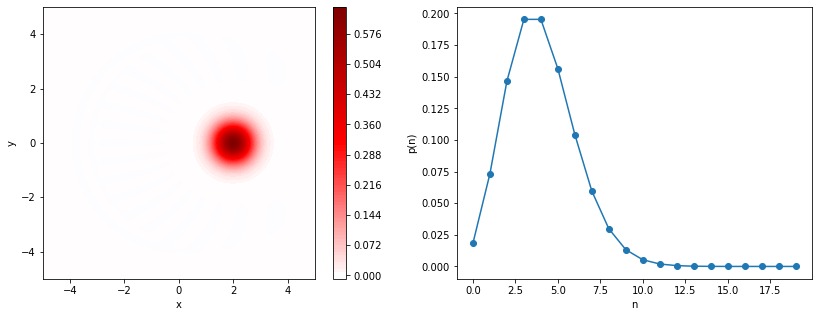

In [72]:
plot_state(psi_alpha,W_coherent,xvec)

We can also create these states by using the displacement operator

In [73]:
D = displace(Ntrun, alpha)
psi_alpha = D*vac 

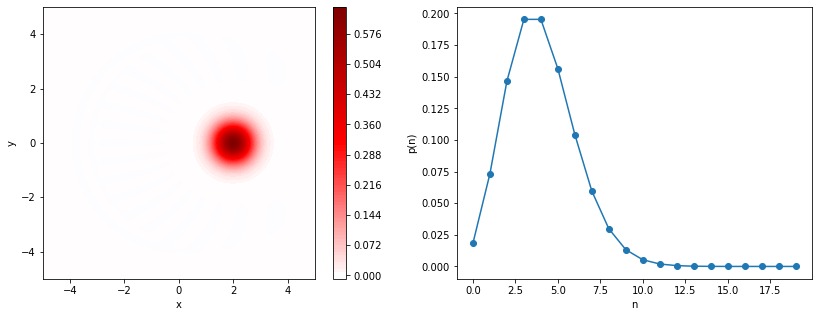

In [74]:
W_coherent= wigner(psi_alpha, xvec, xvec, g= 2)
plot_state(psi_alpha,W_coherent,xvec)

## Fock states

Let us see now Wigner functions of Fock states, which are non-classical states with a well-defined number of photons

Fock state 1

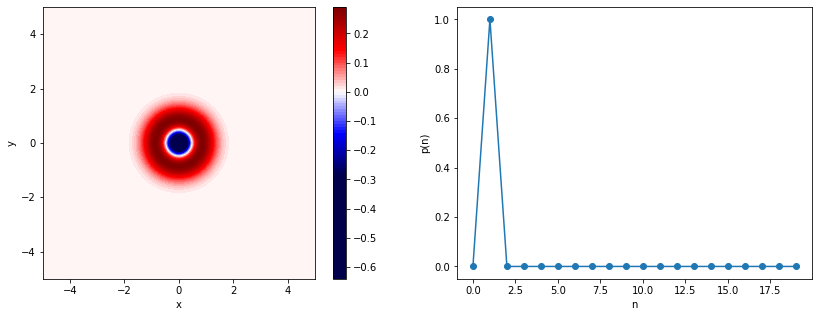

In [75]:
psi = basis(Ntrun,1)
Wigner = wigner(psi, xvec, xvec, g= 2)

plot_state(psi,Wigner,xvec)

Fock state 4

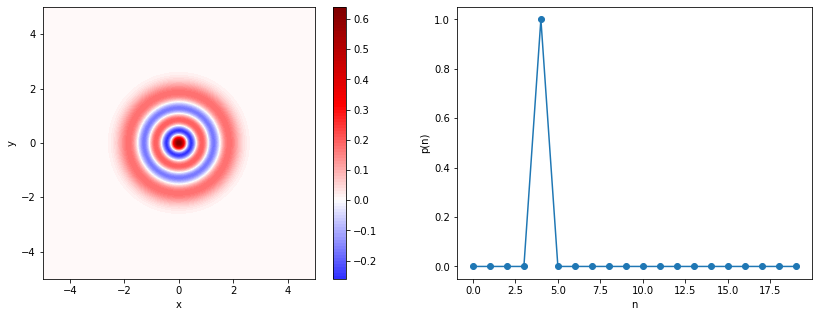

In [76]:
psi = basis(Ntrun,4)
Wigner = wigner(psi, xvec, xvec, g= 2)

plot_state(psi,Wigner,xvec)

Notice something very important: the Wigner function has now negative values!!